In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import base64


1 Physical GPUs, 1 Logical GPUs


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

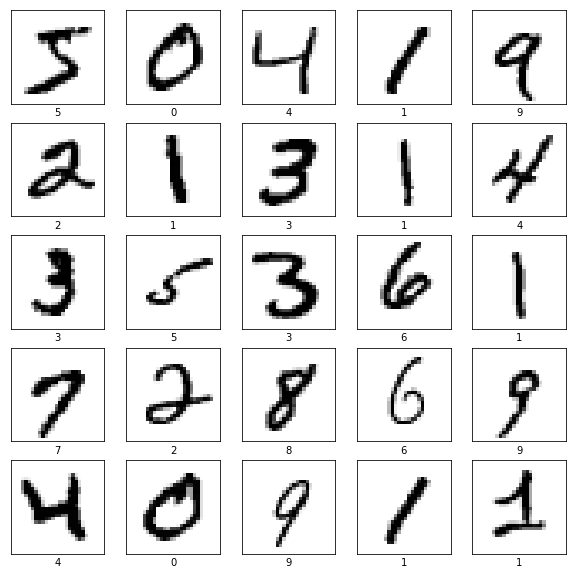

In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X=np.squeeze(train_images[i]), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
#plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3, 3)
                        ,strides=(2,2)
                        ,name='Conv1', activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2),name='Pool1'))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3)
                        ,strides=(2,2)
                        ,name='Conv2', activation='relu'))
#model.add(layers.MaxPooling2D((2, 2),name='Pool2'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3) ,strides=(1,1)
                        ,name='Conv3', activation='relu'))
model.add(layers.Flatten(name='Flatten'))
model.add(layers.Dense(64,name='Dense', activation='relu'))
model.add(layers.Dense(10,name='Soft', activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 13, 13, 32)        320       
_________________________________________________________________
Conv2 (Conv2D)               (None, 6, 6, 64)          18496     
_________________________________________________________________
Conv3 (Conv2D)               (None, 4, 4, 32)          18464     
_________________________________________________________________
Flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
Dense (Dense)                (None, 64)                32832     
_________________________________________________________________
Soft (Dense)                 (None, 10)                650       
Total params: 70,762
Trainable params: 70,762
Non-trainable params: 0
____________________________________________________

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))
#history = model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1765 - accuracy: 0.9462 - val_loss: 0.0612 - val_accuracy: 0.9803
Epoch 2/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0485 - val_accuracy: 0.9849
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0389 - accuracy: 0.9874 - val_loss: 0.0409 - val_accuracy: 0.9869
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 5/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.0337 - val_accuracy: 0.9899
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0355 - val_accuracy: 0.9897
Epoch 7/10
60000/60000 [==============================] 

In [10]:
image_index = 4478
pred = model.predict(test_images[image_index].reshape(1, 28, 28, 1))
print(pred.argmax(),"  ",test_labels[image_index])

8    8


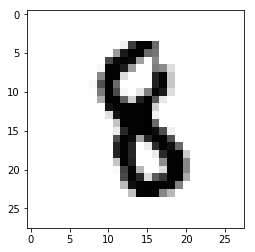

In [11]:
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')

In [12]:
def SaveModel(my_model,fileSTR):
    totalbytes=0
    data=[]
    Wmodel = open("./Mokka/"+fileSTR+".weights", "wb")
    for x in my_model.weights:
        nn = x.numpy()
        T = nn
        #if (nn.ndim == 4):
        #    T = np.transpose(nn, (3,0,1,2))
        #elif (nn.ndim == 3):
        #    T = np.transpose(nn, (2,0,1))
        #else:
        #    T = nn.transpose()
        v = np.ndarray.tobytes(T)
        Wmodel.write(bytearray(v))
        totalbytes+=len(v)
        print(x.name, len(v)," dims:",nn.ndim," ", T.shape)
        #if "bias" in x.name:
         #   print(T)
        data.append(base64.b64encode(v).decode("utf-8"))
    Wmodel.close()
    print("Total bytes:"+str(totalbytes))

In [13]:
SaveModel(model,"PRUEBA")

Conv1/kernel:0 1152  dims: 4   (3, 3, 1, 32)
Conv1/bias:0 128  dims: 1   (32,)
Conv2/kernel:0 73728  dims: 4   (3, 3, 32, 64)
Conv2/bias:0 256  dims: 1   (64,)
Conv3/kernel:0 73728  dims: 4   (3, 3, 64, 32)
Conv3/bias:0 128  dims: 1   (32,)
Dense/kernel:0 131072  dims: 2   (512, 64)
Dense/bias:0 256  dims: 1   (64,)
Soft/kernel:0 2560  dims: 2   (64, 10)
Soft/bias:0 40  dims: 1   (10,)
Total bytes:283048


In [14]:
model.get_layer('Conv1').weights

[<tf.Variable 'Conv1/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.00428652, -0.02534824,  0.0401081 ,  0.14545661,
            0.03626338, -0.37757576, -0.15422614,  0.28529832,
            0.023997  , -0.22535397, -0.22473803, -0.05056885,
           -0.05566123, -0.17337723,  0.08629384,  0.00103101,
            0.03437   ,  0.14458999, -0.3761369 , -0.01996945,
            0.09413728, -0.29786575,  0.10194764, -0.05587458,
            0.00385715, -0.16938967,  0.32116187, -0.14374827,
            0.16489209, -0.11288478, -0.16330333, -0.15048423]],
 
         [[ 0.0349367 , -0.39630228, -0.09551033,  0.21419804,
            0.12197744, -0.22036763, -0.04467951,  0.29693276,
           -0.06049857, -0.39676476,  0.12726691, -0.16862194,
           -0.01263065,  0.1223572 ,  0.10925867,  0.30945104,
            0.0892119 ,  0.08325844, -0.03921682, -0.1383789 ,
           -0.05617411,  0.09179575, -0.10880419, -0.23624946,
            0.06603757,  0.02460124, -0.2

In [15]:
model.get_layer('Conv2').weights

[<tf.Variable 'Conv2/kernel:0' shape=(3, 3, 32, 64) dtype=float32, numpy=
 array([[[[-5.72624616e-02,  1.46796525e-01, -5.79835884e-02, ...,
            6.30009100e-02,  1.31230265e-01,  7.70907570e-03],
          [ 1.53200194e-01, -3.62400413e-01, -5.19408435e-02, ...,
           -1.57760397e-01,  1.44163504e-01,  1.58265367e-01],
          [-3.09437122e-02, -1.16035774e-01, -4.64489870e-02, ...,
            7.43999779e-02,  2.03394413e-01,  1.96823925e-02],
          ...,
          [ 1.36275310e-03,  7.53517747e-02, -8.58676061e-02, ...,
            8.22746307e-02,  9.66891926e-03, -2.60847192e-02],
          [ 4.46237549e-02, -2.32878268e-01, -2.55481184e-01, ...,
            1.59380034e-01,  1.11590400e-01, -1.11171216e-01],
          [ 9.85135958e-02, -4.89137545e-02, -2.90746748e-01, ...,
           -3.58690098e-02,  2.50683967e-02, -1.26565516e-01]],
 
         [[-1.01835160e-02, -9.30203125e-02,  3.38603780e-02, ...,
            1.71162754e-01,  1.29620269e-01, -3.82237695e-02]

In [16]:
model.get_layer('Conv3').output

<tf.Tensor 'Conv3/Identity:0' shape=(None, 4, 4, 32) dtype=float32>

In [17]:
model.get_layer('Conv3').weights

[<tf.Variable 'Conv3/kernel:0' shape=(3, 3, 64, 32) dtype=float32, numpy=
 array([[[[ 1.04653813e-01, -1.77892119e-01, -2.25340903e-01, ...,
           -1.64892510e-01,  5.46736585e-04,  1.46492064e-01],
          [ 1.03272647e-01,  1.21007495e-01, -1.59482956e-01, ...,
           -2.74485499e-01,  1.14914685e-01,  3.26049589e-02],
          [ 1.97421201e-02,  1.63745172e-02, -1.59657195e-01, ...,
            6.05224445e-02,  8.19709897e-02, -7.15971142e-02],
          ...,
          [ 5.70363887e-02, -1.47774369e-01,  5.80334216e-02, ...,
            1.78936981e-02, -2.72630632e-01,  2.38270149e-01],
          [ 5.99366277e-02, -3.87219526e-02,  1.86483085e-01, ...,
            1.02859490e-01, -1.96313769e-01,  5.05243167e-02],
          [-6.76684976e-02, -7.16565773e-02, -8.47261921e-02, ...,
           -5.14677353e-02, -1.45157501e-01,  8.92115980e-02]],
 
         [[-4.97369021e-02, -3.06051284e-01, -4.35694046e-02, ...,
            3.81848440e-02,  1.61311194e-01, -8.25654194e-02]

In [18]:
model.evaluate(test_images,  test_labels, verbose=1,batch_size=128)

10000/1 [===] - 0s 13us/sample - loss: 0.0233 - accuracy: 0.9889


[0.046578623982251884, 0.9889]

In [19]:
model.evaluate(train_images,  train_labels, verbose=1,batch_size=128)

60000/1 [=======] - 1s 11us/sample - loss: 0.0428 - accuracy: 0.9972


[0.008673354774294421, 0.99721664]